<a href="https://colab.research.google.com/github/soyeunju/ESAA/blob/main/25-1/Assignments/0411_Week6_HW_PGML_RecommendationSystem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📊 파머완 ch9. 1-4

p.584-601

## 1. 추천시스템의 개요와 배경

### 추천시스템의 유형
* 콘텐츠 기반 필터링(Content based filtering)
* 협업 필터링(Collaborative filtering)
  * 최근접 이웃 협업 필터링(Nearest Neighbor)
  * 잠재 요인 헙업 필터링(Latent Factor)

## 2. 콘텐츠 기반 필터링 추천 시스템
* 콘텐츠 기반 필터링 방식은 사용자가 특정한 아이템을 매우 선호하는 경우, 그 아이템과 비슷한 콘텐츠(ex. 영화의 경우 장르, 감독, 출연 배우, 키워드 등을 의미)를 가진 다른 아이템을 추천하는 방식.

## 3. 최근접 이웃 협업 필터링
* 사용자가 아이템에 매긴 평점 정보나 상품 구매 이력과 같은 사용자 행동 양식(User Behavior)만을 기반으로 추천을 수행하는 것이 협업 필터링(Collaborative Filtering) 방식
* 협업 필터링의 주요 목표는 사용자一아이템 평점 매트릭스와 같은 축적된 사용자 행동 데이터를 기반으로 사용자가 아직 평가하지 않은 아이템을 예측 평가(Predicted Rating)하는 것
  * 협업 필터링은 최근접 이웃 방식과 잠재 요인 방식으로 나뉘며, 두 방식 모두 **사용자-아이템 평점 행렬** 데이터에만 의지해 추천을 수행.
  * 행(Row)은 개별 사용자, 열(Column)은 개별 아이템으로 구성되며 사용자 아이디 행, 아이템 아이디 열 위치에 해당하는 값이 평점을 나타내는 형태.
  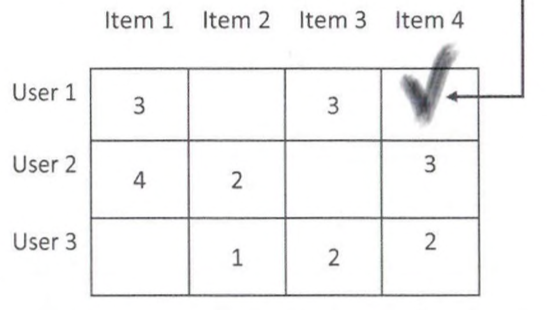
  * 로우 레벨 형태의 사용자 -아이템 평점 데이터의 경우 `pivot_table()`와 같은 함수를 이용해 사용자-아이템 평점 행렬 형태로 변환

* 최근접 이웃 협업 필터링은 다시 두 가지로 나뉠 수 있음
  * 사용자 기반 (User-User): 당신과 비슷한 고객들이 다음 상품도 구매했습니다. **특정 사용자와 타 사용자 간의 유사도(Similarity)**를 측정한 뒤(ex. 코사인유사도) 가장 유사도가 높은 Top-N 사용자를 추출해 그들이 선호하는 아이템을 추천하는 방식.
  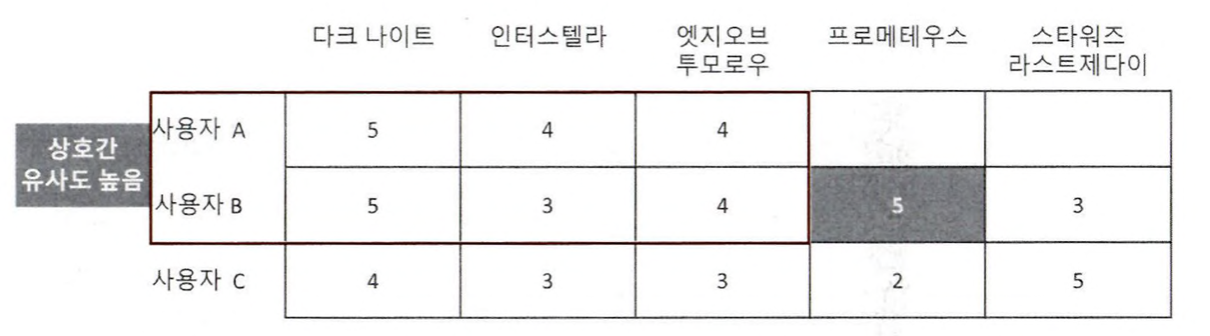
  * 아이템 기반(Item-Item): 이 상품을 선택한 다른 고객들은 다음 상품도 구매했습니다. 아이템이 가지는 속성과는 상관없이 사용자들이 그 아이템을 좋아하는지/싫어하는지의 평가 척도가 유사한 아이템을 추천하는 기준이 되는 알고리즘. **아이템과 아이템 간 상호 유사도 측정**
  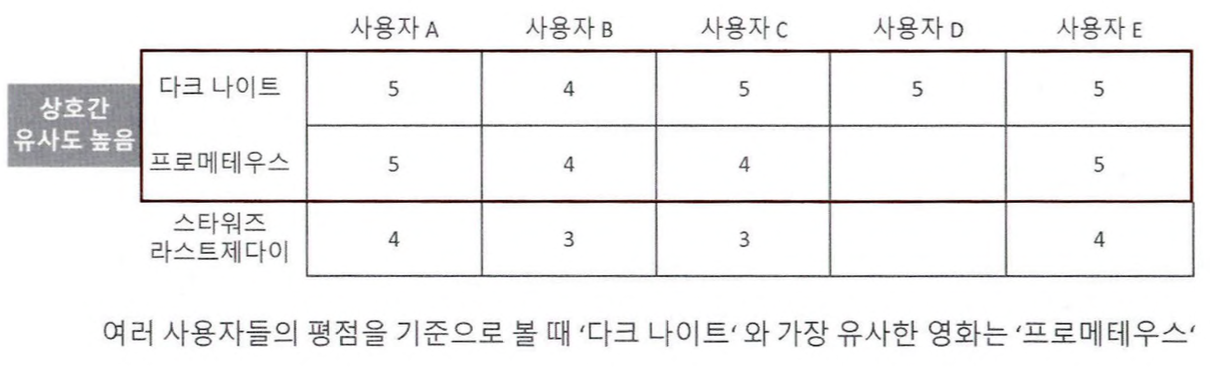

## 4. 잠재 요인 협업 필터링
* 잠재 요인 협업 필터링은 사용자-아이템 평점 매트릭스 속에 숨어 있는 잠재 요인을 추출해 추천 예측을 할 수 있게 하는 기법
  * 대규모 다차원 행렬을 SVD와 같은 차원 감소 기법으로 분해하는 과정에서 잠재 요인을 추출하는데, 이러한 기법을 행렬 분해(Matrix Factorization)라고 함.
* 다차원 희소 행렬인 사용자一아이템 행렬 데이터를 저차원 밀집 행렬의 **사용자-잠재 요인 행렬**과 **아이템-잠재 요인 행렬**의 전치 행렬(즉, 잠재 요인-아이템 행렬)로 분해할 수 있으며, 이렇게 분해된 두 행렬의 내적을 통해 새로운 예측 사용자—아이템 평점 행렬 데이터를 만들어서 사용자가 아직 평점을 부여하지 않는 아이템에 대한 예측 평점을 생성하는 것이 잠재 요인 협력 필터링 알고리즘
  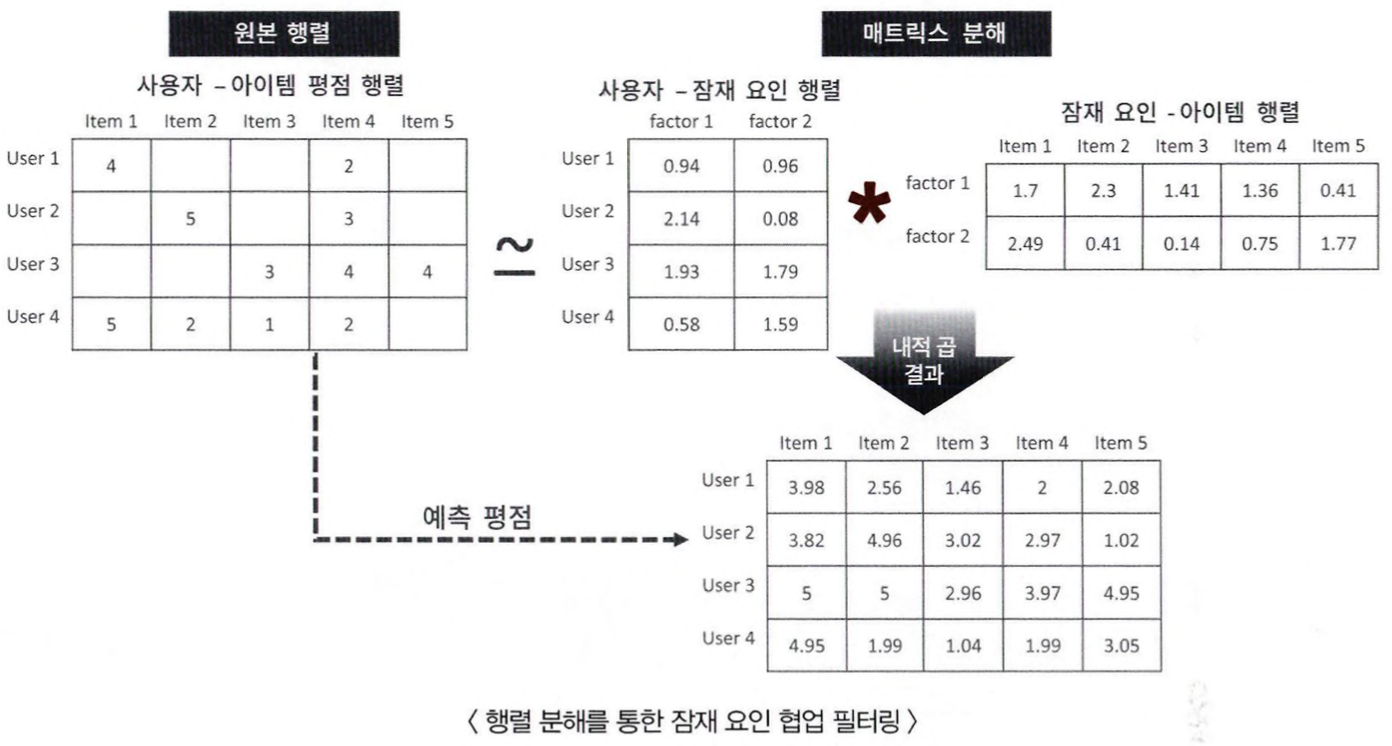

### 행렬 분해의 이해
* 행렬 분해는 다차원의 매트릭스를 저차원 매트릭스로 분해하는 기법으로서 대표적으로 다음과 같은 것들이 있음
  * SVD(Singular Vector Decomposition)
  * NMF(Non—Negative Matrix Factorization)
* M개의 사용자(User) 행과 N개의 아이템(item) 열을 가진 **평점 행렬 R**은 M X N 차원으로 구성되며, 행렬 분해를 통해서 **사용자-K 차원 잠재 요인 행렬 P**(P는 MXK 차원)와 **K 차원 잠재 요인 - 아이템 행렬 Q.T**(Q.T는 KXN 차원)로 분해될 수 있음(아는 아이템-잠재 요인 행렬이며, Q.T는 Q의 전치 행렬인 잠재 요인-아이템 행렬)
  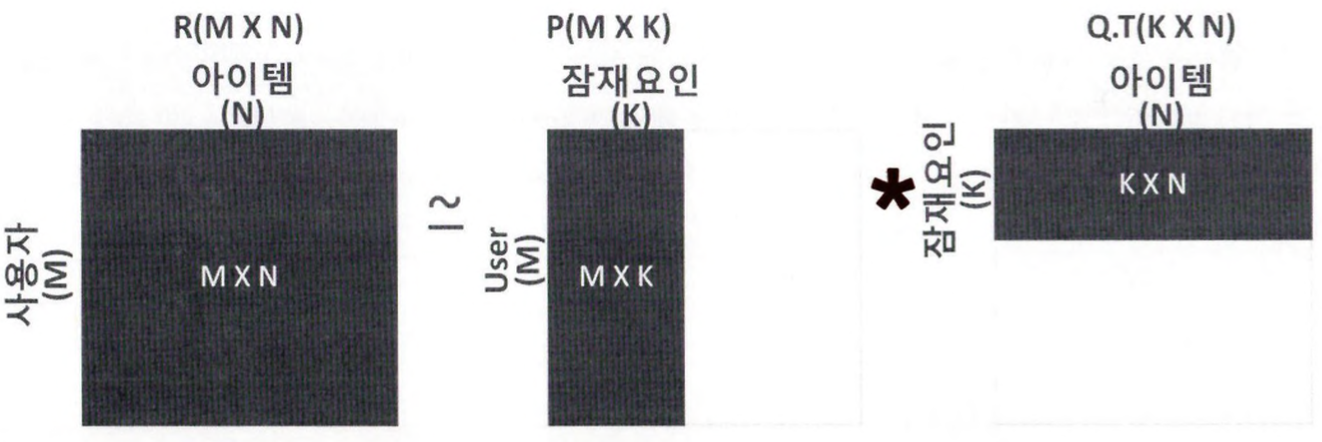


* 예를 들어
  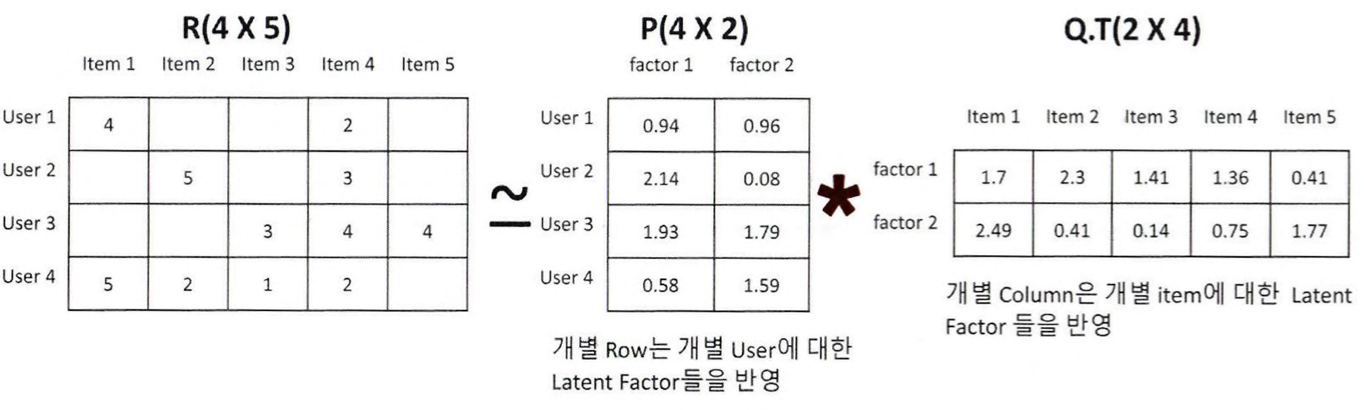
* R 행렬의 u행 사용자와 두열 아이템 위치에 있는 평점 데이터는

  $r_{(u,i)} = p_u * q_i^t$ 로 유추할 수 있다.
* 이때, 사용자가 이미 평가한 혹은 평가하지 않은 값도 잠재 요인으로 분해된 P 행렬과 Q 행렬을 이용해 예측할 수 있음.






* 사용자-아이템 평점 행렬의 미정 값을 포함한 모든 평점 값은 행렬 분해를 통해 얻어진 P 행렬과 Q.T 행렬의 내적을 통해 예측 평점으로 다시 계산할 수 있음

  $R \simeq \hat{R} = P * Q.T$
  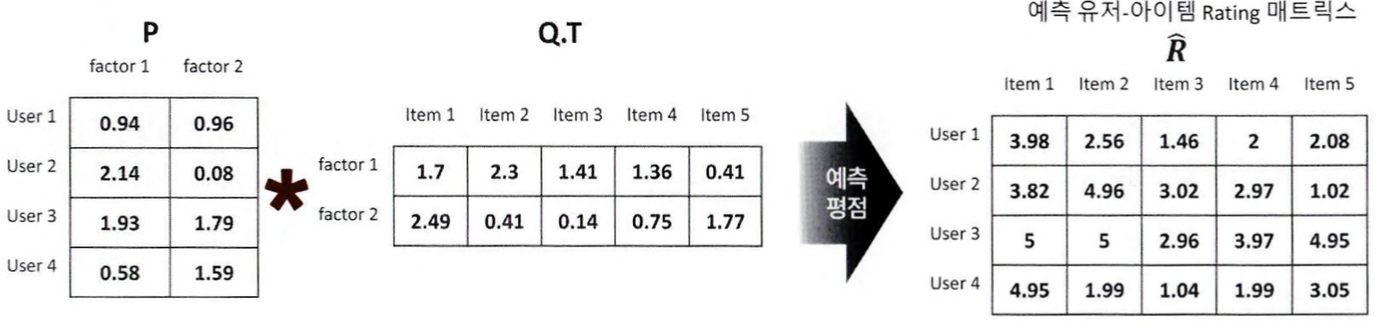

행렬 분해는 주로 SVD(Singular Value Decomposition) 방식을 이용. 하지만 SVD는 널(NaN) 값이 없는 행렬에만 적용할 수 있기 때문에, 확률적 경사 하강법 (Stochastic Gradient Descent, SGD)이나 ALS(Alternating Least Squares) 방식을 이용해 SVD를 수행

### 확률적 경사 하강법을 이용한 행렬 분해
* P와 Q 행렬로 계산된 예측 R 행렬 값이 실제 R 행렬 값과 가장 최소의 오류를 가질 수 있도록 반복적인 비용 함수 최적화를 통해 P와 Q를 유추해내는 것

  1) P와 Q를 임의의 값을 가진 행렬로 설정.

  2) P와 Q.T 값을 곱해 예측 R 행렬을 계산하고 예측 R 행렬과 실제 R 행렬에 해당하는 오류 값을 계산.

  3) 이 오류값을 최소화 할 수 있도록 P와 Q행렬을 적절한 값으로 각각 업데이트

  4) 만족할 만한 오류 값을 가질 때까지 2, 3번 작업을 반복하면서 P와 Q 값을 업데이트해 근사화.

* 실제 값과 예측값의 오류 최소화와 L2 규제를 고려한 비용 함수식은 다음과 같음

  $minΣ(r_{(u,i)}-p_u*q_i^t)^2 + λ(\|q_i\|^2 + \|p_u\|^2)$

* 위의 비용 함수를 최소화하기 위해서 새롭게 업데이트되는 $p'_u$와 $q'_i$는 다음과 같이 계산

  $p'_u = p_u + \eta(e_{(u,i)}*q_i - λ*p_u)$

  $q'_i = q_i + \eta(e_{(u,i)}*p_u - λ*q_i)$
  * $p'_u$: 행렬의 사용자 U행 벡터
  * $q'_i$: Q행렬의 아이템i행의 전치벡터
  * $r_{(u,i)}$: 실제 R행렬의 u,i 위치 값
  * $\hat{r}_{(u,i)}$: 예측 R행렬의 u,i 위치 값. $p_u*q_i^t$로 계산
  * $e_{(u,i)}$: 실제 R행렬의 u,i 위치 값과 예측 행렬 값의 차이 오류
  * $ƞ$: SGD 학습률
  * $λ$: L2규제 계수

In [1]:
import numpy as np

# 원본 행렬 R 생성. 분해 행렬 P와 Q 초기화. 잠재 요인 차원 K는 3으로 설정
R = np.array([[4, np.nan, np.nan, 2, np.nan],
              [np.nan, 5, np.nan, 3, 1],
              [np.nan, np.nan, 3, 4, 4],
              [5, 2, 1, 2, np.nan]])
num_users, num_items = R.shape
K = 3

# P와 Q 행렬의 크기를 지정하고 정규 분포를 가진 임의의 값으로 입력
np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users, K))
Q = np.random.normal(scale=1./K, size=(num_items, K))

In [2]:
# 실제 R 행렬과 예측 행렬의 오차를 구하는 get_rmse( ) 함수 생성
from sklearn.metrics import mean_squared_error

def get_rmse(R,P,Q,non_zeros):
  error = 0

  # 두 개의 분해된 행렬 P와 Q.T의 내적으로 예측 행렬 R을 생성
  full_pred_matrix = np.dot(P,Q.T)

  # 실제 R행렬에서 널이 아닌 값의 위치 인덱스 추출해 실제 R 행렬과 예측 행렬의 RMSE 예측
  x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
  y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
  R_non_zeros = R[x_non_zero_ind,y_non_zero_ind]
  full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind,y_non_zero_ind]
  mse = mean_squared_error(R_non_zeros,full_pred_matrix_non_zeros)
  rmse = np.sqrt(mse)

  return rmse

In [3]:
# R>0인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장
non_zeros = [(i,j,R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j]>0 ]

steps = 1000
learning_rate = 0.1
r_lambda = 0.01

# SGD 기법으로 P와 Q 매트릭스를 계속 업데이트.
for step in range(steps):
  for i,j,r in non_zeros:
    # 실제값과 예측값의 차이인 오류값 구함
    eij = r - np.dot(P[i,:],Q[j,:].T)
    # Regularization을 반영한 SGD 업데이트 공식 적용
    P[i,:] = P[i,:] + learning_rate*(eij*Q[j,:]-r_lambda*P[i,:])
    Q[j,:] = Q[j,:] + learning_rate*(eij*P[i,:]-r_lambda*Q[j,:])
    rmse = get_rmse(R, P, Q, non_zeros)
    if (step%50)==0:
      print('### iteration step: ', step, 'rmse: ', rmse)

### iteration step:  0 rmse:  3.25187845360079
### iteration step:  0 rmse:  3.2444052260039506
### iteration step:  0 rmse:  3.167084216936956
### iteration step:  0 rmse:  3.1495983559019014
### iteration step:  0 rmse:  3.1522336245710996
### iteration step:  0 rmse:  3.1351500912707544
### iteration step:  0 rmse:  3.0969531517038758
### iteration step:  0 rmse:  3.0620074299003566
### iteration step:  0 rmse:  3.034770934658341
### iteration step:  0 rmse:  3.017899599963068
### iteration step:  0 rmse:  3.016150964663611
### iteration step:  0 rmse:  2.9960320460843546
### iteration step:  50 rmse:  0.07395440138778553
### iteration step:  50 rmse:  0.06293874014868941
### iteration step:  50 rmse:  0.06276280567104289
### iteration step:  50 rmse:  0.06202583363084654
### iteration step:  50 rmse:  0.06217862283901784
### iteration step:  50 rmse:  0.061965052827622095
### iteration step:  50 rmse:  0.06205093549860854
### iteration step:  50 rmse:  0.06176165752149148
### itera

In [4]:
pred_matrix = np.dot(P,Q.T)
print('예측 행렬:\n', np.round(pred_matrix,3))

예측 행렬:
 [[3.991 1.708 1.128 1.999 1.662]
 [5.813 4.977 0.597 2.986 1.002]
 [6.696 1.761 2.987 3.982 3.991]
 [4.973 1.991 1.    2.001 1.727]]
